In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import glob

In [13]:
## Todo: Einlesen der Reihe nach ermöglichen (zeitliche Reihenfolge beachten)

max_number = 5
allImages = []
for image_path in glob.glob("/data/Radarbilder_DWD/*.png"):
    image = plt.imread(image_path)
    #print(image_path,"\n", image.shape, image.dtype)
    allImages.append(image)
    max_number -=1
    if max_number == 0:
        break

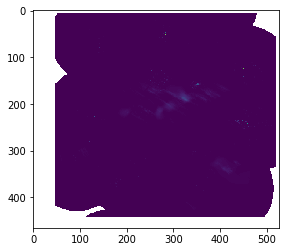

In [27]:
plt.imshow(allImages[0])

In [41]:
img = allImages[0][100:103,100:103]
#plt.imshow(img)
print(img)
print("shape =",img.shape)
#ToDo: wieso ist das ein  3D array? bzw. wieso ist die dritte Dimension 4? Falls Transparenzwert = unnötig
# Optional könnten Bilder auch in 16Bit Graustufen gespeichert werden.

[[[0.26666668 0.00392157 0.32941177 1.        ]
  [0.26666668 0.00392157 0.32941177 1.        ]
  [0.26666668 0.00392157 0.32941177 1.        ]]

 [[0.26666668 0.00392157 0.32941177 1.        ]
  [0.26666668 0.00392157 0.32941177 1.        ]
  [0.26666668 0.00392157 0.32941177 1.        ]]

 [[0.26666668 0.00392157 0.32941177 1.        ]
  [0.26666668 0.00392157 0.32941177 1.        ]
  [0.26666668 0.00392157 0.32941177 1.        ]]]
shape = (3, 3, 4)


In [81]:
##
# imgList  = Liste mit 3D Arrays (kann noch angepasst werden, wenn daten 2D vorliegen)
# n_input  = anzahl Bilder die ins Netz gehen
# n_output = anzahl Zeitschritte die vorausgesagt werden sollen
def list_to_set(imgList, n_input, n_output):
    x = None
    y = None

    assert(n_input+n_output <= len(imgList))

    for i in range(n_input+n_output):
        img = imgList[i][:,:,0]
        if i < n_input:
            if x is None:
                x=np.atleast_3d(img)
            else:
                x = np.dstack((x,img))
        else:        
            if y is None:
                y=np.atleast_3d(img)
            else:
                y = np.dstack((y,img))
    return (x, y)
  
einTrainingssample = list_to_set(allImages, n_input=3, n_output=2)
data = einTrainingssample[0]
label = einTrainingssample[1]
print(data.shape, label.shape)

(466, 526, 3) (466, 526, 2)


In [ ]:
# ToDo: nächste Schritte sind:
#   Richtige Daten einlesen
#   Zeitliche Reihenfolge beachten
#   Uninteressante Daten rausfiltern (kein Regen = langweilig)
#   Dataset (oder wie auch imer das heißt bei Keras) implementieren